# Eth2 Validator Economics Model: State Space Experiment Analysis

## Setup

Import the setup module, which runs shared notebook configuration methods, such as loading IPython modules:

In [1]:
import setup

time: 12.7 ms (started: 2021-04-29 21:42:14 +02:00)


## Dependencies

Import notebook specific depependencies:

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pd.options.plotting.backend = "plotly"

time: 529 ms (started: 2021-04-29 21:42:14 +02:00)


In [3]:
from experiments.run import run
from experiments.post_processing import post_process
import visualizations as visualizations

time: 497 ms (started: 2021-04-29 21:42:14 +02:00)


## Experiment

Import the experiment to be run and analysed in this notebook:

In [4]:
from experiments.default import experiment

time: 18.5 ms (started: 2021-04-29 21:42:15 +02:00)


Run the experiment, and get the raw results:

In [5]:
results, _exceptions = run(experiment)

2021-04-29 21:42:15,399 - root - INFO - Running experiment
2021-04-29 21:42:15,473 - root - INFO - Starting run 0
2021-04-29 21:42:17,721 - root - INFO - Experiment complete
time: 2.35 s (started: 2021-04-29 21:42:15 +02:00)


Convert the raw results to a Pandas DataFrame, and post-process the results:

In [6]:
df = pd.DataFrame(results)
df = post_process(df)
df

eth_price    eth_supply  eth_staked  supply_inflation  \
1    1533.659710  1.155342e+08   3881408.0         -0.032686   
2    1552.653598  1.155301e+08   3894208.0         -0.029677   
3    1577.018425  1.155259e+08   3907008.0         -0.029675   
4    1582.705423  1.155217e+08   3919808.0         -0.029672   
5    1600.592209  1.155175e+08   3932608.0         -0.029667   
..           ...           ...         ...               ...   
806  1612.068095  1.123283e+08  14192768.0         -0.028008   
807  1615.519497  1.123245e+08  14205568.0         -0.028004   
808  1585.923048  1.123207e+08  14218368.0         -0.028010   
809  1556.520941  1.123168e+08  14231168.0         -0.028006   
810  1505.520634  1.123130e+08  14243968.0         -0.028003   

     number_of_validators_in_activation_queue  average_effective_balance  \
1                                         230               3.200000e+10   
2                                         230               3.200000e+10   
3                                         230               3.200000e+10   
4                                         230               3.200000e+10   
5                                         230               3.200000e+10   
..                                        ...                        ...   
806                                         0               3.200000e+10   
807                                         0               3.200000e+10   
808                                         0               3.200000e+10   
809                                         0               3.200000e+10   
810                                         0               3.200000e+10   

     number_of_validators  number_of_validators_online  \
1                  121294                       118868   
2                  121694                       119260   
3                  122094                       119652   
4                  122494                       120044   
5                  122894                       120436   
..                    ...                          ...   
806                443524                       434654   
807                443924                       435046   
808                444324                       435438   
809                444724                       435830   
810                445124                       436222   

     number_of_validators_offline  base_reward  ...  staas_full_profit_yields  \
1                            2426    3286400.0  ...                  0.076162   
2                            2434    3280000.0  ...                  0.076003   
3                            2442    3273600.0  ...                  0.075844   
4                            2450    3270400.0  ...                  0.075751   
5                            2458    3264000.0  ...                  0.075592   
..                            ...          ...  ...                       ...   
806                          8870    1718400.0  ...                  0.037781   
807                          8878    1715200.0  ...                  0.037713   
808                          8886    1715200.0  ...                  0.037711   
809                          8894    1715200.0  ...                  0.037709   
810                          8902    1715200.0  ...                  0.037707   

     staas_self_custodied_profit_yields  supply_inflation_pct  \
1                              0.078850             -3.268615   
2                              0.078685             -2.967723   
3                              0.078520             -2.967469   
4                              0.078424             -2.967219   
5                              0.078260             -2.966708   
..                                  ...                   ...   
806                            0.039115             -2.800804   
807                            0.039044             -2.800423   
808                            0.039042             -2.801027   
809  

time: 347 ms (started: 2021-04-29 21:42:17 +02:00)


## Analysis

Analyze and visualize the results:

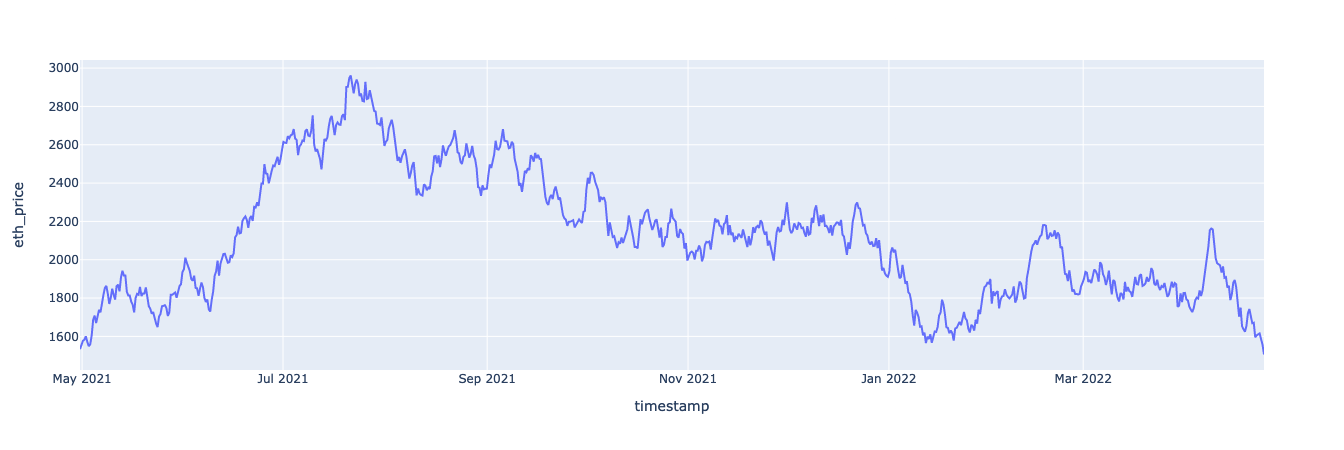

time: 595 ms (started: 2021-04-29 21:42:18 +02:00)


In [7]:
df.plot(x='timestamp', y='eth_price')

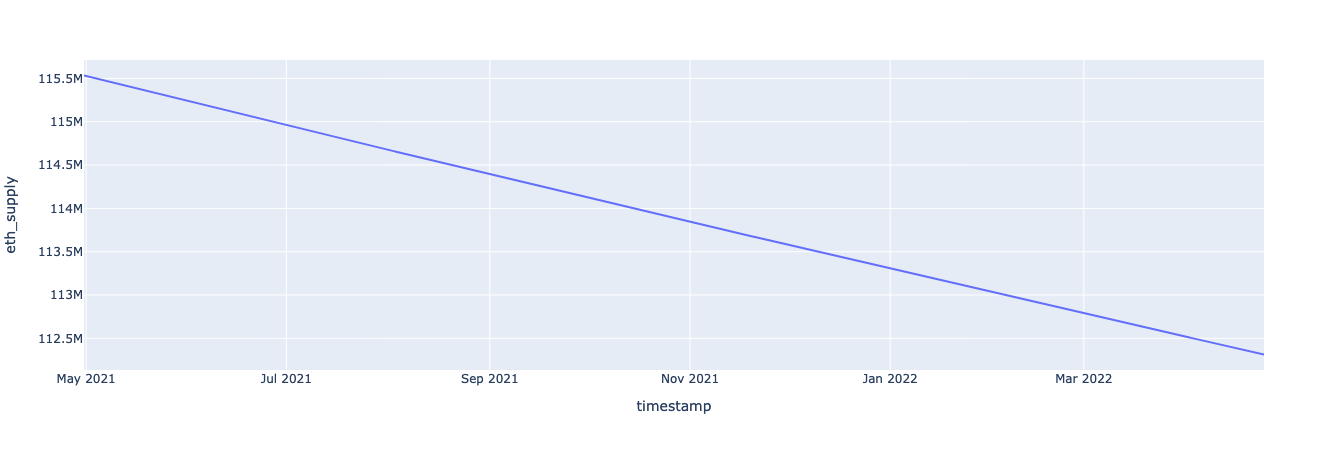

time: 114 ms (started: 2021-04-29 21:42:18 +02:00)


In [8]:
df.plot(x='timestamp', y='eth_supply')

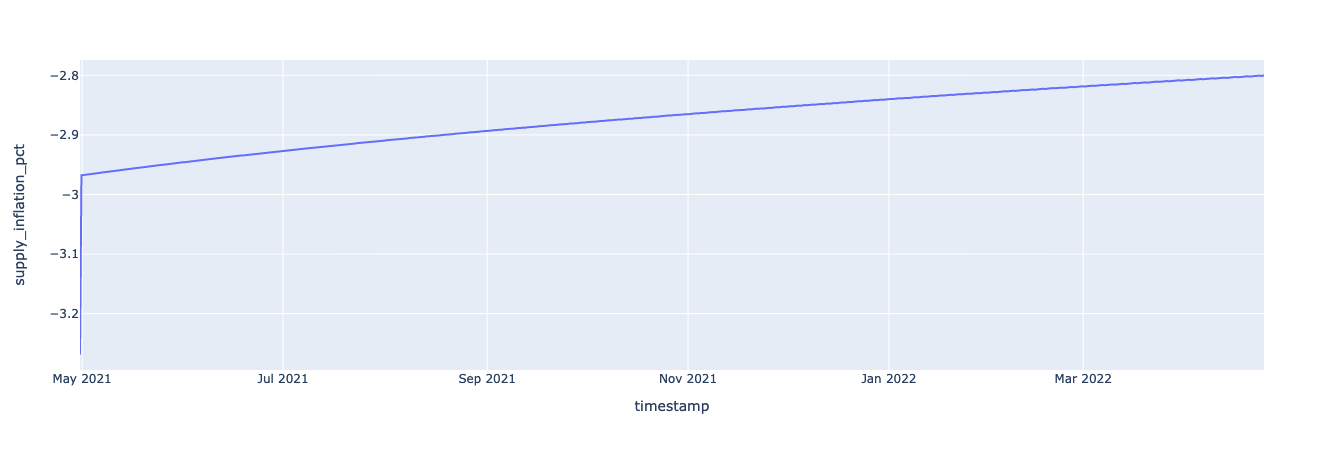

time: 155 ms (started: 2021-04-29 21:42:18 +02:00)


In [9]:
df.plot(x='timestamp', y='supply_inflation_pct')

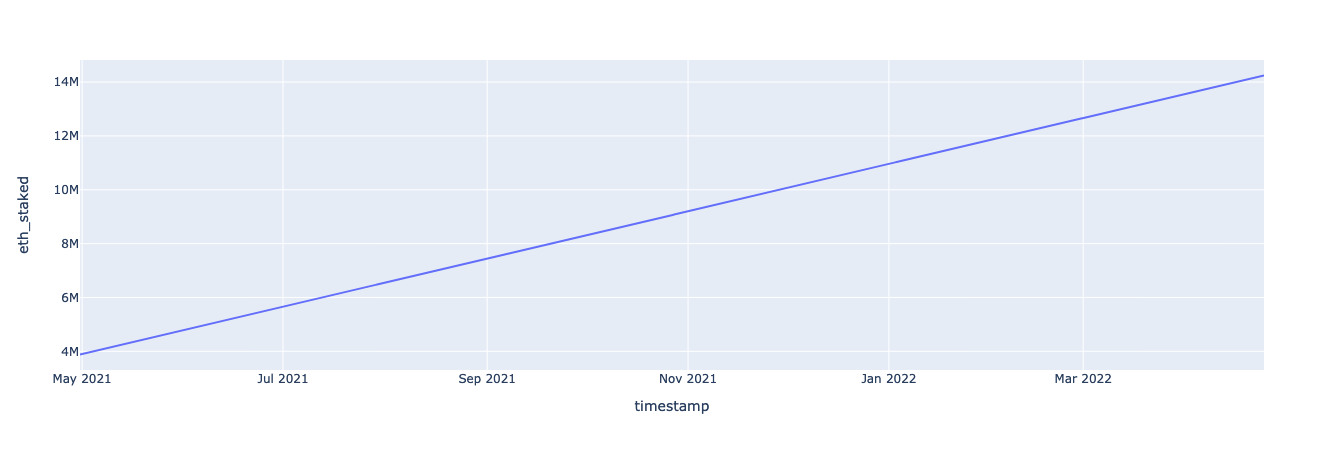

time: 95.4 ms (started: 2021-04-29 21:42:18 +02:00)


In [10]:
df.plot(x='timestamp', y='eth_staked')

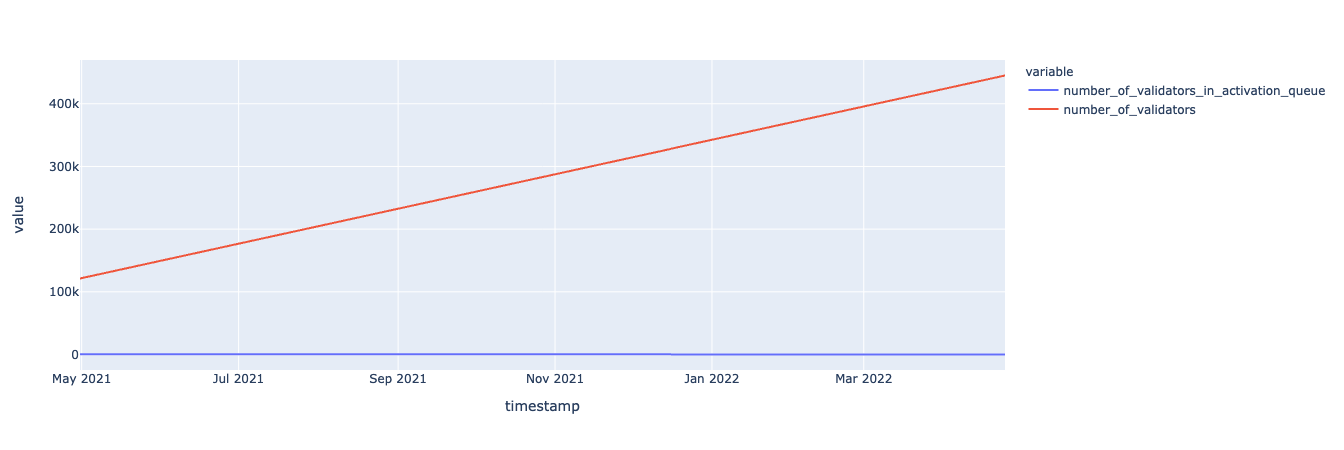

time: 156 ms (started: 2021-04-29 21:42:19 +02:00)


In [11]:
df.plot(x='timestamp', y=['number_of_validators_in_activation_queue','number_of_validators'])

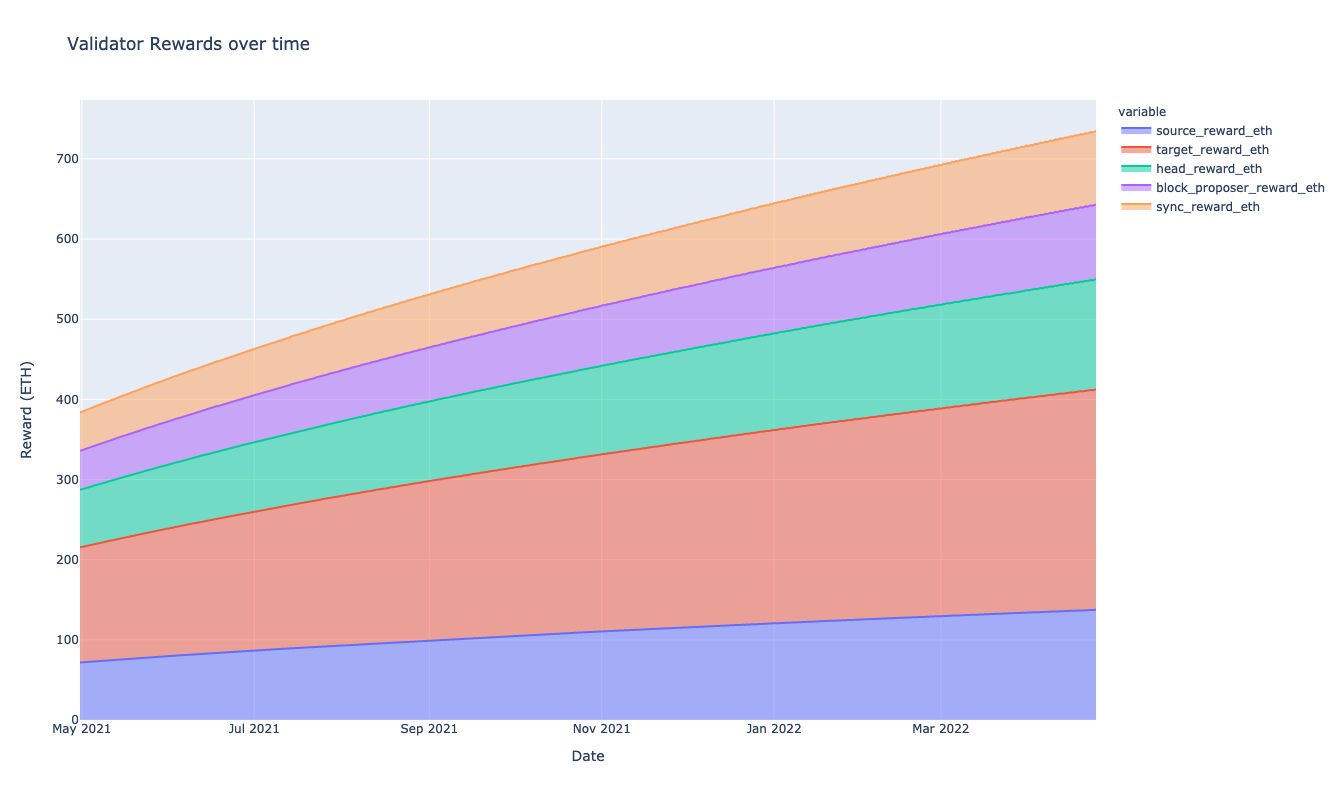

time: 394 ms (started: 2021-04-29 21:43:18 +02:00)


In [21]:
visualizations.plot_validator_rewards(df)

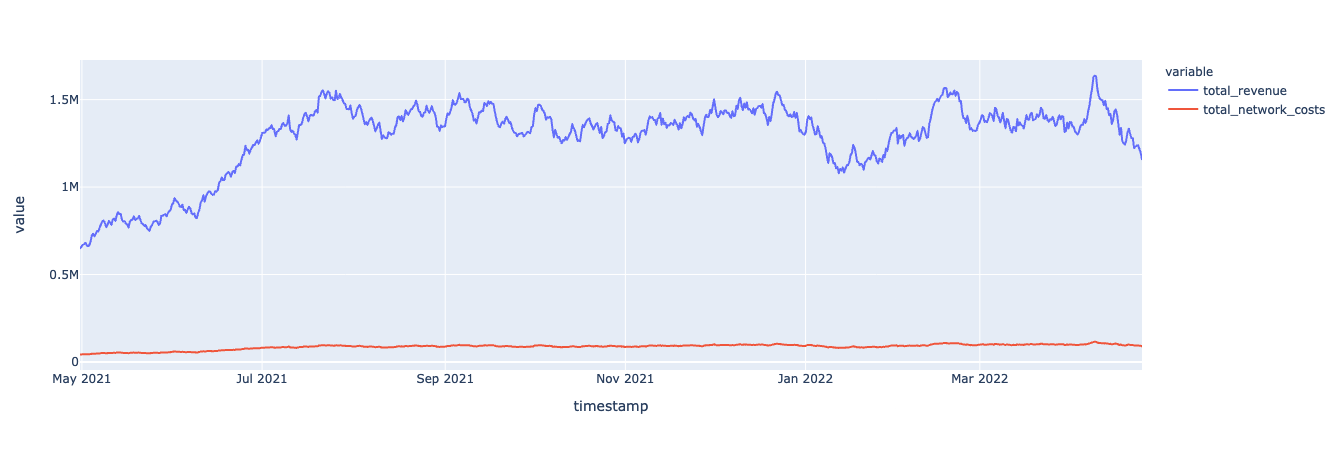

time: 139 ms (started: 2021-04-29 21:42:33 +02:00)


In [14]:
df.plot(x='timestamp', y=['total_revenue', 'total_network_costs'])

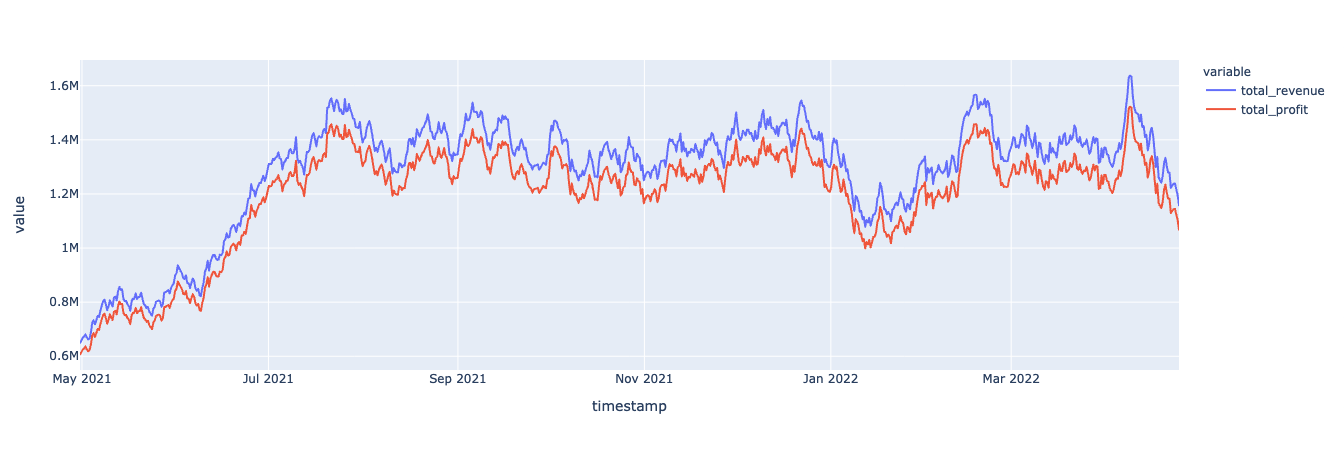

time: 150 ms (started: 2021-04-29 21:42:33 +02:00)


In [15]:
df.plot(x='timestamp', y=['total_revenue', 'total_profit'])

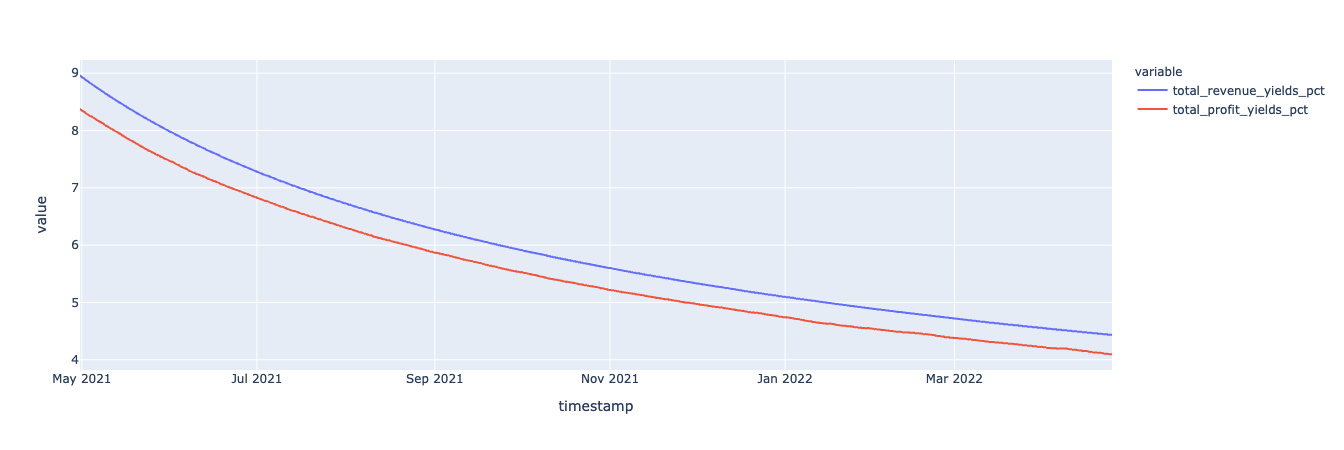

time: 154 ms (started: 2021-04-29 21:42:34 +02:00)


In [16]:
df.plot(x='timestamp', y=['total_revenue_yields_pct', 'total_profit_yields_pct'])

In [17]:
from model.parameters import validator_types

hardware_costs = [validator.type + '_hardware_costs' for validator in validator_types]
cloud_costs = [validator.type + '_cloud_costs' for validator in validator_types]
third_party_costs = [validator.type + '_third_party_costs' for validator in validator_types]

time: 31.8 ms (started: 2021-04-29 21:42:34 +02:00)


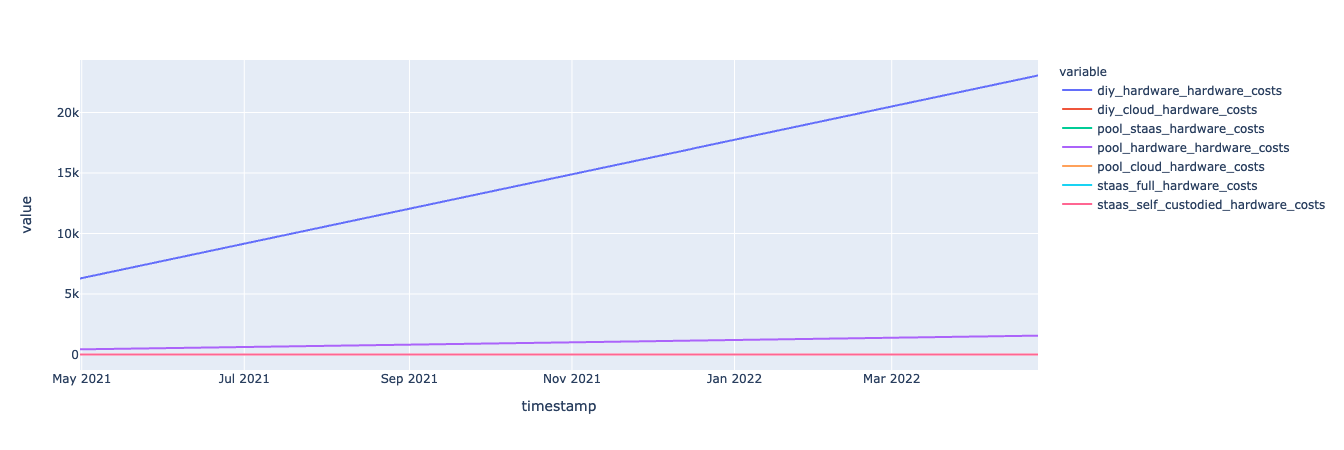

time: 314 ms (started: 2021-04-29 21:42:34 +02:00)


In [18]:
df.plot(x='timestamp', y=hardware_costs)

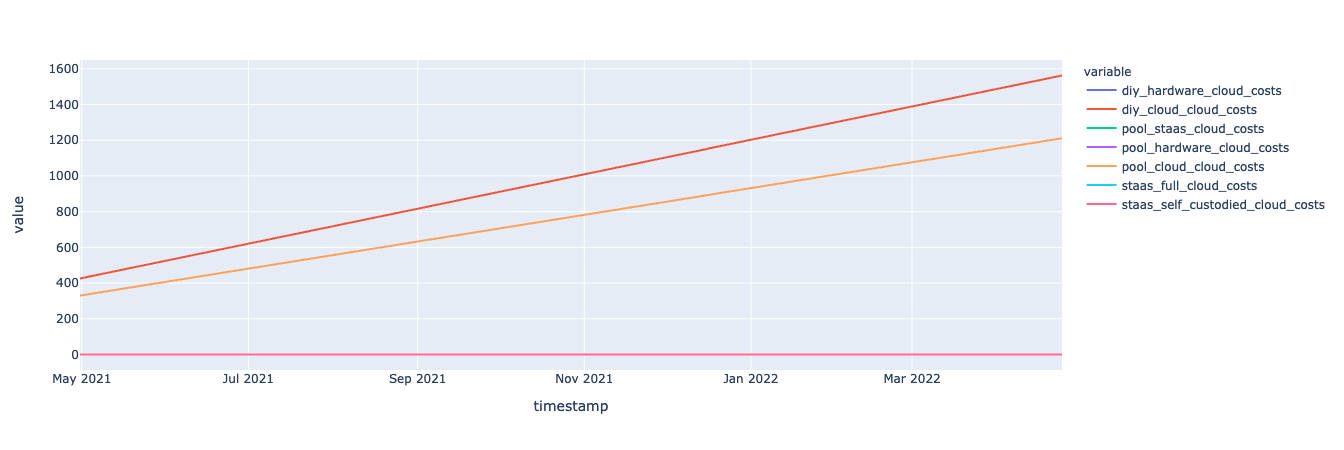

time: 290 ms (started: 2021-04-29 21:42:35 +02:00)


In [19]:
df.plot(x='timestamp', y=cloud_costs)

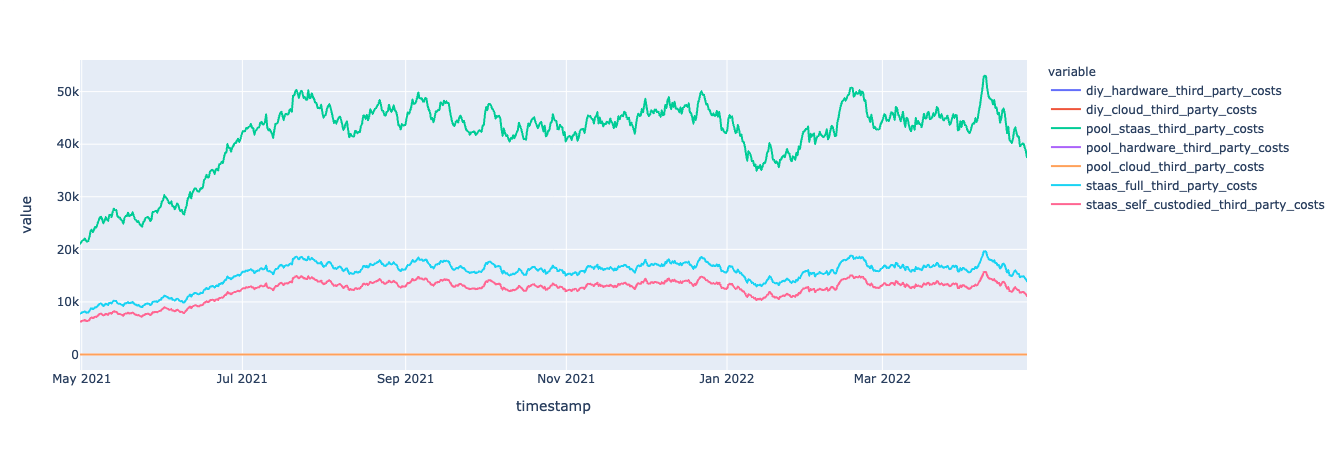

time: 315 ms (started: 2021-04-29 21:42:35 +02:00)


In [20]:
df.plot(x='timestamp', y=third_party_costs)